In [ ]:
# !pip install selenium==3.11.0  >> 주어진 ChromeDriver, GhostDriver 와 호환

#### Selenium & Driver(for browser) 준비

- Selenium : http://selenium-python.readthedocs.io/ 에서 공식 문서 확인 가능
- **GhostDriver (PhantomJS)** : 크롬 드라이버와 달리 실제 화면을 띄우지 않은 상태에서 백그라운드에서 크롤링이 가능
- ChromeDriver & GhostDriver 다운로드 후 작업 폴더에 위치시키기 

In [86]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup 
import time
import pandas as pd

<br>
<br>

## 1. Selenium 둘러보기

In [87]:
df = pd.read_excel('result_190729_0552.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"""6살 한국 유튜버 90억원 건물 매입"" CNN '보람튜브' 소개",2019.07.27. 오후 5:18,【서울=뉴시스】CNN이 27일 한국의 인기 아동 유튜브 콘텐츠 '보람채널'의 흥행을...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴시스
1,"CNN도 주목한 '보람튜브'…""아동 유튜버, 과거에도 논란""",2019.07.27. 오후 4:03,보람튜브 갈무리 © 뉴스1(서울=뉴스1) 이원준 기자 = 유명 유튜브 채널 '보람튜...,https://news.naver.com/main/read.nhn?mode=LSD&...,뉴스1
2,"CNN, '보람튜브' 주목… ""아동유튜버 논란 우려""",2019.07.27. 오후 5:39,/사진=보람튜브 유튜브채널 캡처유명 유튜브채널 ‘보람튜브’에 대해 외신들도 주목하기...,https://news.naver.com/main/read.nhn?mode=LSD&...,머니S
3,'보람튜브 빌딩 매입'보다 주목해야 할 사실,2019.07.27. 오후 4:54,"키즈콘텐츠 성공, 영유아 시청시간에 비례…스마트폰 ‘과의존’ 아이들 늘었다 영유아기...",https://news.naver.com/main/read.nhn?mode=LSD&...,미디어오늘
4,[오태훈의 시사본부] 강남 빌딩 매입한 ‘보람튜브’ 고수익의 비밀,2019.07.26. 오후 3:42,- 보람튜브 위상 어마어마해…해외 크리에이터와 견줘도 뒤쳐지지 않는 글로벌 콘텐츠 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,KBS


In [88]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
# driver = webdriver.PhantomJS('(driver) phantomjs.exe')

translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko&client=tw-ob#ko/en/' # 마지막 ko & en이 언어에 해당
driver.get(translate_url) # Get the page
print(driver.current_url)

https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko&client=tw-ob#ko/en/


<br>

## 문장 번역 & 크롤링

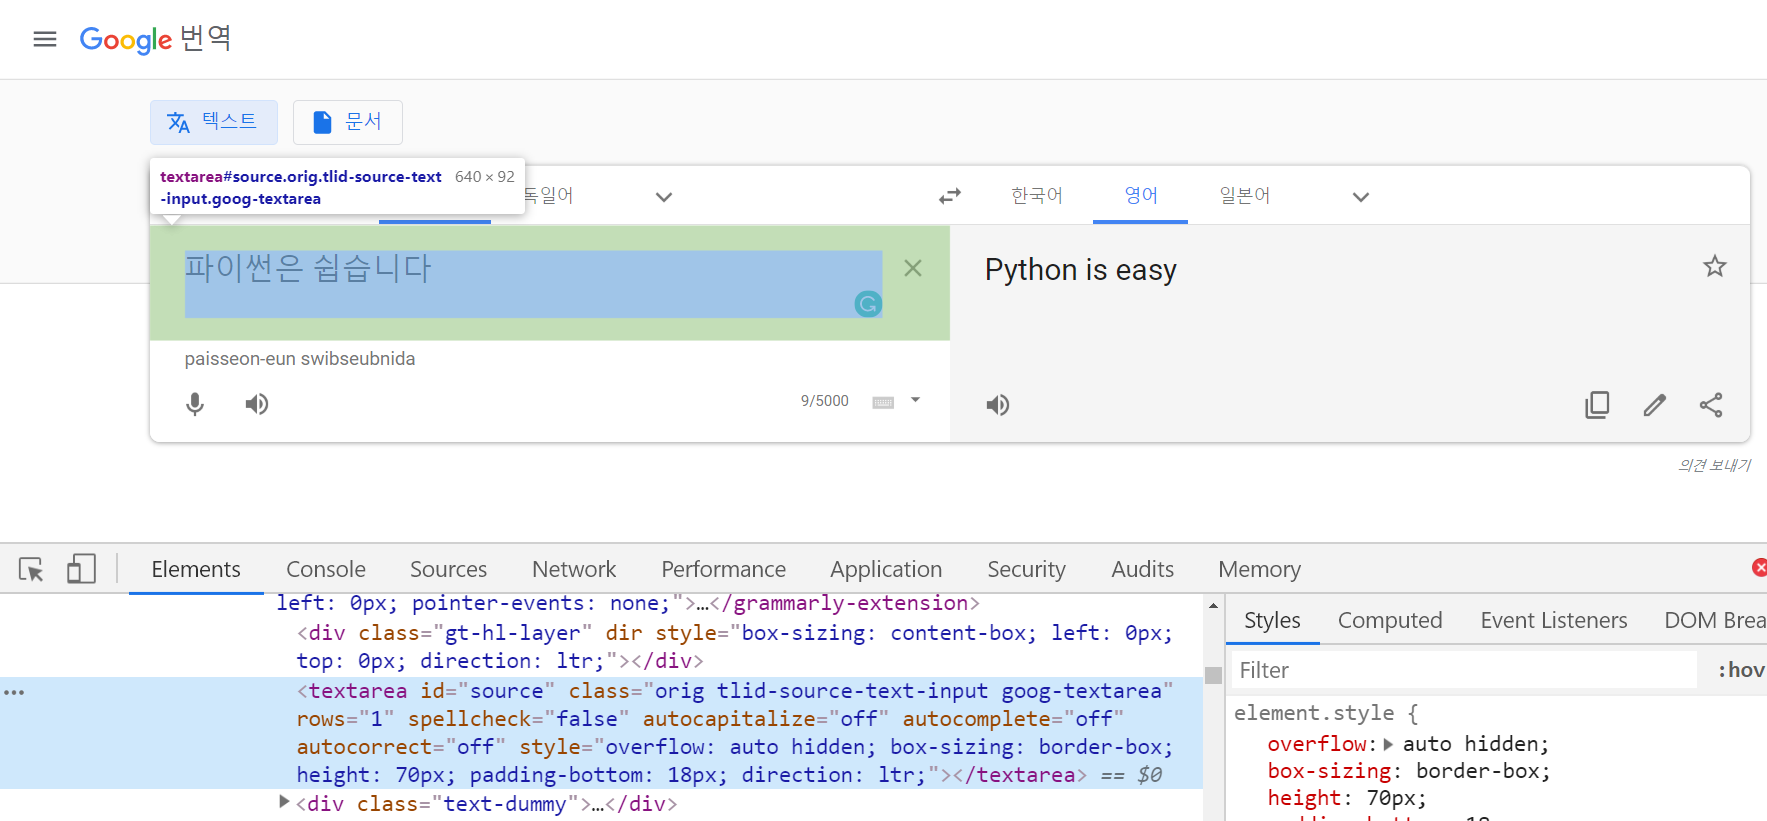

In [89]:
driver.find_element_by_id('source').send_keys('파이썬은 쉽습니다') # Send keys, 번역창 id가 source임

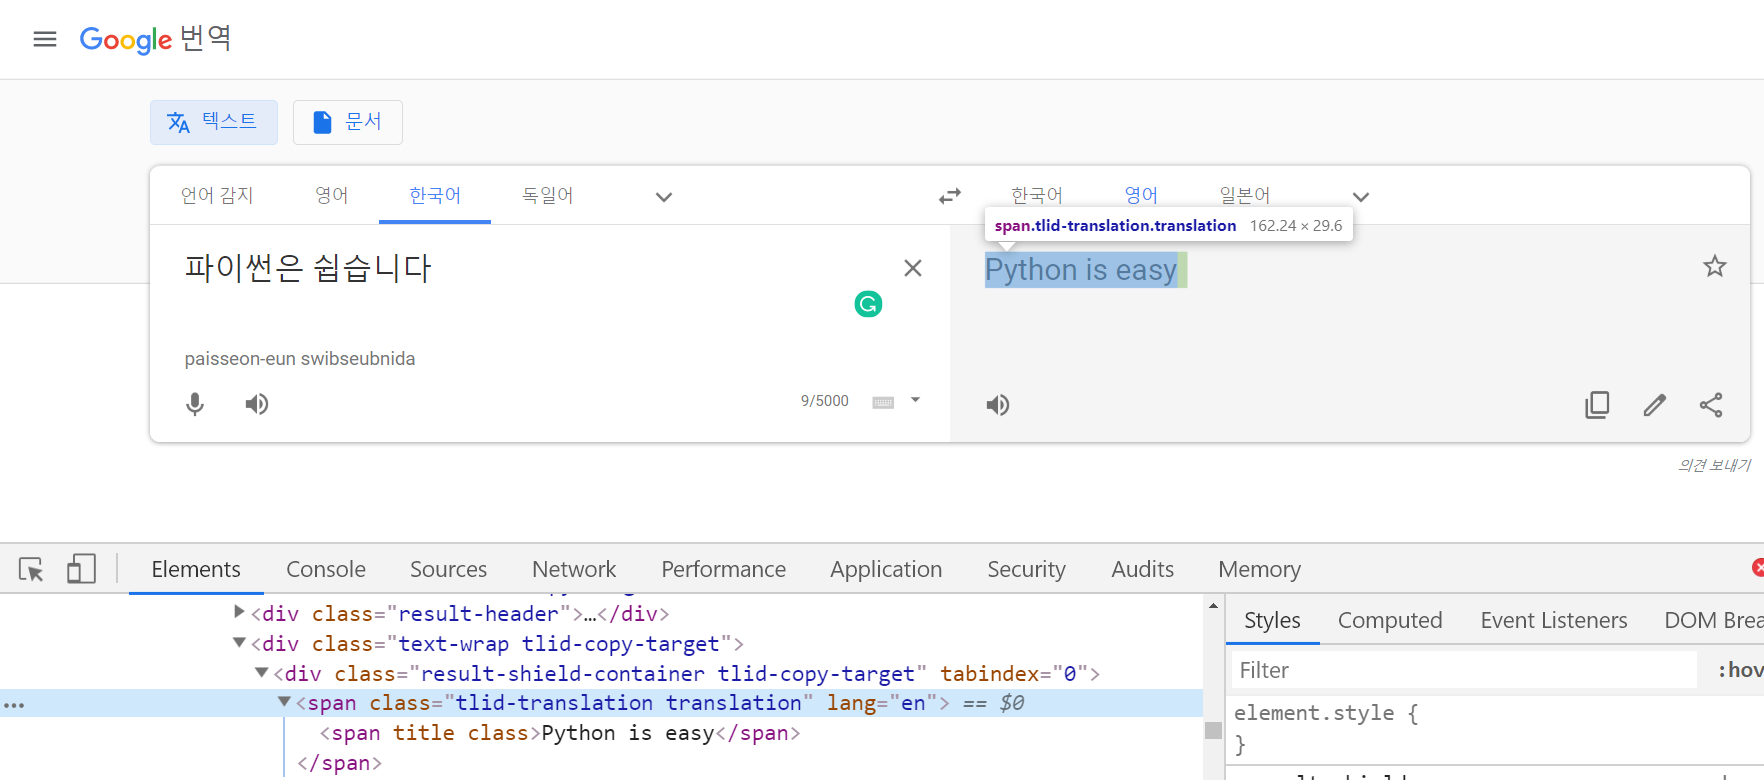

In [93]:
translated_contents = driver.find_element_by_class_name('tlid-translation') 
#css_selector를 활용하면 좀 더 정확하게 tag를 targetiing
# 급할 때는 xpath 활용해서 직접 그 구문을 tracking < tag 위에서 오른쪽 마우스 클릭해서 xpath copy >
print(translated_contents)
print(translated_contents.text) # text 

<selenium.webdriver.remote.webelement.WebElement (session="43087f354d07e8d7c15d1ca091cf6368", element="0.5409451877631903-2")>
Python is easy


<br>

## 기사글 번역 & 크롤링

In [25]:
article = df['Article'][0]

driver.find_element_by_id('source').clear() # 깔끔하게 비우기(clear)
driver.find_element_by_id('source').send_keys(article)
time.sleep(3)

translated_contents = driver.find_element_by_class_name('tlid-translation').text
print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][0]))
print(translated_contents)

기사글 [ "6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개 ] 의 번역이 끝났습니다.
[Seoul = News] CNN veröffentlichte am 27. einen Artikel, in dem die Popularität des beliebten YouTube-Inhalts für Kinder 'Reward Channel' vorgestellt wird. Das Foto zeigt die Internet-Veröffentlichung von CNN. 2019.07.27 【Seoul = Nachrichten】 Woo Eun-sik Reporter = CNN hat einen Artikel über die Popularität von Koreas populärem YouTube-Inhalt 'Boram Tube' und den jüngsten Kauf von Immobilien veröffentlicht. CNN hat am 26. 30 Millionen Abonnenten. Südkoreas sechsjähriger YouTube-Star hat angeblich ein fünfstöckiges Immobiliengebäude in Seoul im Wert von 9,5 Milliarden Won gekauft. Lee Boram (6), der auf dem belohnenden Kanal erscheint, ist die Hauptfigur von zwei Kanälen, 'Boram Tube Toy Review' mit 13,6 Millionen Abonnenten und 'Boram Tube Vlog' mit 17,6 Millionen Abonnenten. Boram Family Co., Ltd., gegründet von Boramyang Parents, wurde Berichten zufolge für 9,5 Milliarden Won das D-Gebäude in Cheongdam-dong, Gangnam-gu, Seoul 

In [13]:
driver.close()
driver.quit()

<br>
<br>

## 2. 기사 원문 전체 번역 (시간이 오래 걸립니다 & 중간에 IP가 막힐 수 있습니다)

In [ ]:
# eng_contents = []

# driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
# # driver = webdriver.PhantomJS('(driver) phantomjs.exe')

# translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko&client=tw-ob#ko/en/' # 마지막 ko & en이 언어에 해당
# driver.get(translate_url) 
# print(driver.current_url)

# for row_index, row in df.iterrows():
#     driver.find_element_by_id('source').clear()
#     driver.find_element_by_id('source').send_keys(df['Article'][0])
#     time.sleep(3)

#     translated_contents = driver.find_element_by_class_name('tlid-translation').text
#     eng_contents.append(translated_contents)
#     print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][row_index]))

# print('전체 contents 번역이 끝났습니다!')

# driver.close()
# driver.quit()


# df['Translated_article'] = eng_contents
# df.to_excel('translation_result.xlsx', index=False, encoding='utf-8')

# print('crawling_result.xlsx 파일로 전체 저장이 완료되었습니다!')

<br>
<br>

## 3. 한글 word_dict에서 상위 항목만 단어로 가져와 번역

In [36]:
from collections import Counter
from konlpy.tag import Okt

articles = df['Article'].tolist()
articles = ''.join(articles)
    
twitter = Okt()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])

word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

In [40]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내어 번역을 진행합니다. (늘릴 수 있습니다.)

translation_target = sorted_word_dic[:100] 
translation_target[-1] # 상위 100번째에 해당하는 단어의 빈도수를 확인합니다. (가장 마지막 item을 호출하려면?)

('달러', 31)

In [62]:
for key, value in word_dic.items():
    print("key : {0} -> value : {1}".format(key,value))

key : 서울 -> value : 46
key : 뉴시스 -> value : 5
key : CNN -> value : 16
key : 27일 -> value : 1
key : 한국 -> value : 71
key : 인기 -> value : 55
key : 아동 -> value : 75
key : 유튜브 -> value : 316
key : 콘텐츠 -> value : 100
key : 보람 -> value : 517
key : 채널 -> value : 276
key : 흥행 -> value : 2
key : 소개 -> value : 22
key : 기사 -> value : 14
key : 실었다 -> value : 2
key : 사진 -> value : 36
key : 인터넷 -> value : 16
key : 보도 -> value : 12
key : 내용 -> value : 18
key : 갈무리 -> value : 4
key : 2019.07 -> value : 1
key : 27 -> value : 1
key : 기자 -> value : 58
key : 튜브 -> value : 356
key : 최근 -> value : 57
key : 부동산 -> value : 17
key : 매입 -> value : 74
key : 소식 -> value : 19
key : 26일 -> value : 9
key : 현지 -> value : 4
key : 시간 -> value : 34
key : 3000만 -> value : 12
key : 구독 -> value : 59
key : 자수 -> value : 12
key : 가지다 -> value : 10
key : 스타 -> value : 14
key : 95억원 -> value : 46
key : 짜다 -> value : 21
key : 건물 -> value : 40
key : 사들이다 -> value : 33
key : 출연 -> value : 13
key : 이보람 -> value : 35
key : 양은 -> va

key : 들보 -> value : 1
key : 어찌 -> value : 1
key : 스트레스 -> value : 2
key : 남다 -> value : 1
key : 자소 -> value : 1
key : 면접 -> value : 1
key : 자격증 -> value : 1
key : 치이다 -> value : 1
key : 대기업 -> value : 3
key : 반의 -> value : 2
key : 반도 -> value : 2
key : 의욕 -> value : 2
key : 심지어 -> value : 2
key : 이쁘다 -> value : 1
key : 잘생기다 -> value : 1
key : 빼다 -> value : 1
key : 오만하다 -> value : 1
key : 토로 -> value : 1
key : 불행하다 -> value : 3
key : 사라지다 -> value : 3
key : 마치다 -> value : 1
key : 100억 -> value : 2
key : 회사원 -> value : 1
key : 평생 -> value : 1
key : 허탈 -> value : 3
key : 반면 -> value : 7
key : 재능 -> value : 2
key : 시기하다 -> value : 1
key : 옳다 -> value : 1
key : 띄다 -> value : 1
key : #명문대 -> value : 1
key : #공부 -> value : 1
key : #유튜브 -> value : 1
key : banaffle@fnnews.com -> value : 1
key : 윤홍집 -> value : 1
key : FM -> value : 1
key : 94.5 -> value : 1
key : 진의 -> value : 1
key : 일시 -> value : 1
key : 목요일 -> value : 2
key : 아나운서 -> value : 2
key : 민기 -> value : 22
key : 커뮤니케이션 -> value : 3


In [52]:
translation_target = {}
for item in word_dic:
    if word_dic[item] >= 31: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정합니다.
        translation_target[item] = word_dic[item]

In [68]:
print(translation_target)

{'서울': 46, '한국': 71, '인기': 55, '아동': 75, '유튜브': 316, '콘텐츠': 100, '보람': 517, '채널': 276, '사진': 36, '기자': 58, '튜브': 356, '최근': 57, '매입': 74, '시간': 34, '구독': 59, '95억원': 46, '건물': 40, '사들이다': 33, '이보람': 35, '독자': 118, '토이': 66, '리뷰': 77, '오다': 42, '브이': 68, '로그': 70, '부모': 74, '패밀리': 69, '지난': 42, '청담동': 45, '빌딩': 146, '알려지다': 62, '따르다': 72, '2017년': 35, '사실': 66, '분석': 48, '사이트': 34, '이상': 43, '광고': 155, '국내': 47, '많다': 85, '수익': 187, '올리다': 76, '수입': 49, '유튜버': 144, '벌다': 33, '가족': 79, '늘다': 81, '관련': 35, '아동학대': 62, '논란': 58, '네이버': 43, '무단': 61, '배포': 55, '금지': 57, '뉴스': 93, '받다': 102, '미국': 36, '방송': 33, '달러': 31, '넘다': 51, '동영상': 66, '장난감': 59, '영상': 188, '고발': 33, '크다': 32, '나오다': 61, '사람': 35, '해당': 35, '대한': 49, '경제': 37, '키즈': 61, '아이': 123, '미디어': 33, '이용': 35, '문제': 46, '어린이': 50, '가다': 62, '추정': 42, '정도': 50, '보다': 131, '때문': 47, '많이': 38, '없다': 50, '강민': 49, '최영일': 46, '운영': 39, '강남': 61, '들다': 35, '회사': 66, '생각': 46, '같다': 60, '실제': 37, '이야기': 33, '수가': 31, '우리': 51, '경우': 4

In [69]:
translation_result = {}

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
# driver = webdriver.PhantomJS('(driver) phantomjs.exe')

translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko&client=tw-ob#ko/en/' # 마지막 ko & en이 언어에 해당
driver.get(translate_url) 
print(driver.current_url)
    
for key in translation_target: # 상위 100번째 빈도수에 해당하는 단어까지 담겨있는 dict
    driver.find_element_by_id('source').clear()
    driver.find_element_by_id('source').send_keys(key)
    time.sleep(1) # 잠깐씩 쉬어주면서 진행합니다.

    translated_contents = driver.find_element_by_class_name('tlid-translation').text
    translation_result[translated_contents] = translation_target[key] # 번역이 완료된 단어 dict의 value로 기존 dict의 value를 꽂아줍니다.
    
    print('단어 {}의 번역 완료 : {}'.format(key, translated_contents))

print('전체 번역이 끝났습니다!')

driver.close()
driver.quit()

https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko&client=tw-ob#ko/en/
단어 서울의 번역 완료 : Seoul
단어 한국의 번역 완료 : Korea
단어 인기의 번역 완료 : popularity
단어 아동의 번역 완료 : child
단어 유튜브의 번역 완료 : Youtube
단어 콘텐츠의 번역 완료 : contents
단어 보람의 번역 완료 : Reward
단어 채널의 번역 완료 : channel
단어 사진의 번역 완료 : Picture
단어 기자의 번역 완료 : reporter
단어 튜브의 번역 완료 : tube
단어 최근의 번역 완료 : lately
단어 매입의 번역 완료 : Purchase
단어 시간의 번역 완료 : time
단어 구독의 번역 완료 : subscribe
단어 95억원의 번역 완료 : KRW 9.5 billion
단어 건물의 번역 완료 : building
단어 사들이다의 번역 완료 : Buy
단어 이보람의 번역 완료 : Lee Boram
단어 독자의 번역 완료 : Reader
단어 토이의 번역 완료 : Toy
단어 리뷰의 번역 완료 : review
단어 오다의 번역 완료 : come
단어 브이의 번역 완료 : V
단어 로그의 번역 완료 : Log
단어 부모의 번역 완료 : parents
단어 패밀리의 번역 완료 : family
단어 지난의 번역 완료 : Last
단어 청담동의 번역 완료 : Cheongdam-dong
단어 빌딩의 번역 완료 : building
단어 알려지다의 번역 완료 : known
단어 따르다의 번역 완료 : follow
단어 2017년의 번역 완료 : 2017's
단어 사실의 번역 완료 : In fact
단어 분석의 번역 완료 : analysis
단어 사이트의 번역 완료 : site
단어 이상의 번역 완료 : More than
단어 광고의 번역 완료 : Advertising
단어 국내의 번역 완료 : domestic
단어 많다의 번역 완료 : many
단어 수익의 번

{'Seoul': 46,
 'Korea': 71,
 'popularity': 55,
 'child': 50,
 'Youtube': 316,
 'contents': 100,
 'Reward': 517,
 'channel': 276,
 'Picture': 36,
 'reporter': 58,
 'tube': 356,
 'lately': 57,
 'Purchase': 74,
 'time': 34,
 'subscribe': 59,
 'KRW 9.5 billion': 46,
 'building': 146,
 'Buy': 33,
 'Lee Boram': 35,
 'Reader': 118,
 'Toy': 66,
 'review': 77,
 'come': 42,
 'V': 68,
 'Log': 70,
 'parents': 74,
 'family': 79,
 'Last': 42,
 'Cheongdam-dong': 45,
 'known': 62,
 'follow': 72,
 "2017's": 35,
 'In fact': 66,
 'analysis': 48,
 'site': 34,
 'More than': 43,
 'Advertising': 155,
 'domestic': 47,
 'many': 85,
 'revenue': 187,
 'raise': 76,
 'income': 49,
 'YouTubers': 144,
 'Earn': 33,
 'gain': 81,
 'relation': 35,
 'Child abuse': 62,
 'argument': 58,
 'Naver': 43,
 'Unauthorized': 61,
 'distribute': 55,
 'prohibition': 57,
 'news': 93,
 'Receive': 102,
 'United States of America': 36,
 'broadcast': 33,
 'dollar': 31,
 'exceed': 51,
 'video': 188,
 'toy': 59,
 'accusation': 33,
 'Big': 3

In [72]:
translation_result['Bo-Ram'] = translation_result['Reward']
# translation_result['YouTuber'] = translation_result['Yu Tuber']
# translation_result['Lee Bo-Ram'] = translation_result['This']

del translation_result['Reward']
# del translation_result['Yu Tuber']
# del translation_result['This']

# or
# translation_result['Bo-Ram'] = translation_result.pop['Reward']


In [73]:
translation_result

{'Seoul': 46,
 'Korea': 71,
 'popularity': 55,
 'child': 50,
 'Youtube': 316,
 'contents': 100,
 'channel': 276,
 'Picture': 36,
 'reporter': 58,
 'tube': 356,
 'lately': 57,
 'Purchase': 74,
 'time': 34,
 'subscribe': 59,
 'KRW 9.5 billion': 46,
 'building': 146,
 'Buy': 33,
 'Lee Boram': 35,
 'Reader': 118,
 'Toy': 66,
 'review': 77,
 'come': 42,
 'V': 68,
 'Log': 70,
 'parents': 74,
 'family': 79,
 'Last': 42,
 'Cheongdam-dong': 45,
 'known': 62,
 'follow': 72,
 "2017's": 35,
 'In fact': 66,
 'analysis': 48,
 'site': 34,
 'More than': 43,
 'Advertising': 155,
 'domestic': 47,
 'many': 85,
 'revenue': 187,
 'raise': 76,
 'income': 49,
 'YouTubers': 144,
 'Earn': 33,
 'gain': 81,
 'relation': 35,
 'Child abuse': 62,
 'argument': 58,
 'Naver': 43,
 'Unauthorized': 61,
 'distribute': 55,
 'prohibition': 57,
 'news': 93,
 'Receive': 102,
 'United States of America': 36,
 'broadcast': 33,
 'dollar': 31,
 'exceed': 51,
 'video': 188,
 'toy': 59,
 'accusation': 33,
 'Big': 32,
 'come out': 

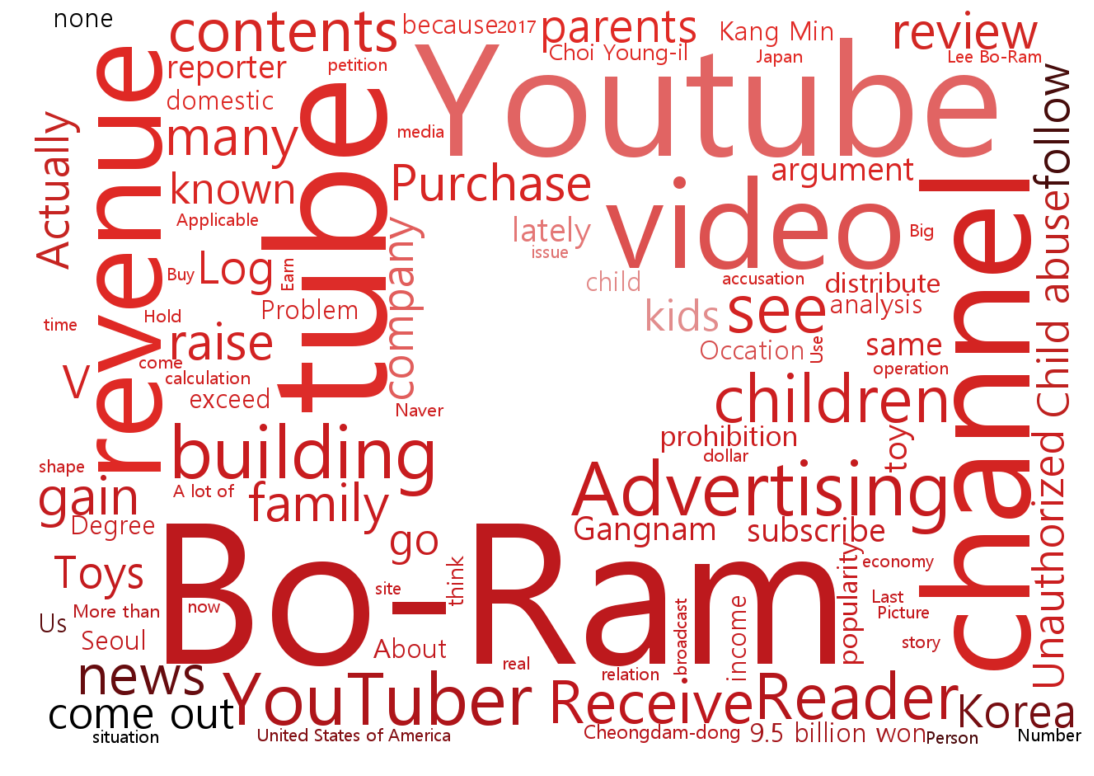

In [82]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

youtube_coloring = np.array(Image.open("youtube_mask.jpg"))
image_colors = ImageColorGenerator(youtube_coloring)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=youtube_coloring, 
                       background_color='white').generate_from_frequencies(translation_result)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>

## (Appendix) 인터파크 투어 크롤링 예시 (.click & .execute_script)

In [2]:
print('http://tour.interpark.com/')

http://tour.interpark.com/


In [3]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 

driver.get('http://tour.interpark.com/')
driver.current_url

'http://tour.interpark.com/'

In [4]:
driver.find_element_by_id('SearchGNBText').send_keys('보라카이')
driver.find_element_by_class_name('search-btn').click()

In [5]:
# driver.implicitly_wait(5)

In [6]:
driver.page_source
web_page = BeautifulSoup(driver.page_source, 'html.parser')
# web_page

In [7]:
driver.find_element_by_class_name('moreBtn').click()

In [8]:
driver.execute_script("searchModule.SetCategoryList(3, '')")

In [9]:
driver.close()
driver.quit()